
\newpage


# Zadanie 1

## Wyliczenie transformaty Laplace'a dla zadanych funkcji, wykorzystując bibliotekę sympy. Biblioteki pandas oraz IPython wykorzystane jedynie do stworzenia tabeli.

In [111]:
import sympy as sp
import pandas as pd
from IPython.display import display, Markdown, Math
from sympy.printing.latex import latex
sp.init_printing()

A, B = 3, 3
C = A + B
t, s = sp.symbols('t, s')
f1_t = A * t * sp.exp(-B * t)
f2_t = A - sp.exp(-2*t) * (sp.sin(t - B) - sp.cos(t - B) 
                            + sp.sin(t - C) * sp.cos(t - C))
F1_s = sp.laplace_transform(f1_t, t, s, noconds=True).simplify()
F2_s = sp.laplace_transform(f2_t, t, s, noconds=True).simplify()

table1 = pd.DataFrame({
    "Funkcja $f(t)$": [f"$$f_{1}(t) = {sp.latex(f1_t)} $$", f"$$f_{2}(t) = {sp.latex(f2_t)} $$"]
})
table2 = pd.DataFrame({
    "Transformata Laplace'a $F(s)$": [f"$$F_{1}(s) = {sp.latex(F1_s)} $$", f"$$F_{2}(s) = {sp.latex(F2_s)} $$"]
})

display(Markdown(table1.to_markdown(index=False)))
display(Markdown(table2.to_markdown(index=False)))

| Funkcja $f(t)$                                                                                                                                         |
|:-------------------------------------------------------------------------------------------------------------------------------------------------------|
| $$f_1(t) = 3 t e^{- 3 t} $$                                                                                                                            |
| $$f_2(t) = - \left(\sin{\left(t - 6 \right)} \cos{\left(t - 6 \right)} + \sin{\left(t - 3 \right)} - \cos{\left(t - 3 \right)}\right) e^{- 2 t} + 3 $$ |

| Transformata Laplace'a $F(s)$                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| $$F_1(s) = \frac{3}{\left(s + 3\right)^{2}} $$                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| $$F_2(s) = \frac{\frac{s \left(\left(s + 2\right) \sin{\left(12 \right)} - 2 \cos{\left(12 \right)}\right) \left(\left(s + 2\right)^{2} + 1\right)}{2} + s \left(\left(s + 2\right)^{2} + 4\right) \left(\sqrt{2} s \sin{\left(\frac{\pi}{4} + 3 \right)} + \cos{\left(3 \right)} + 3 \sin{\left(3 \right)}\right) + 3 \left(\left(s + 2\right)^{2} + 1\right) \left(\left(s + 2\right)^{2} + 4\right)}{s \left(\left(s + 2\right)^{2} + 1\right) \left(\left(s + 2\right)^{2} + 4\right)} $$ |

## Symulacja odpowiedzi układu, o transmitancji równej F1(s), na skok jednostkowy (amplitudy 1 i 5).
Wykorzystano biblioteki control oraz sympy.

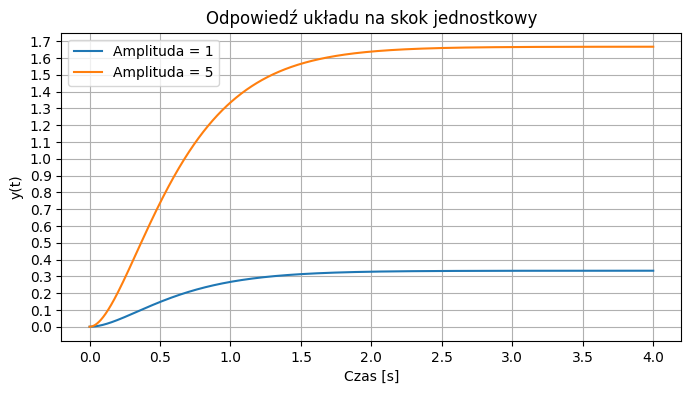

In [112]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

L_s, M_s = sp.fraction(F1_s)
num_coeffs = [float(c) for c in sp.Poly(L_s, s).all_coeffs()]
den_coeffs = [float(c) for c in sp.Poly(M_s, s).all_coeffs()]

K_s = ctrl.TransferFunction(num_coeffs, den_coeffs)

T = np.linspace(0, 4, 1200)
plt.figure(figsize=(8,4))
for A_step in [1, 5]:
    T, y_t = ctrl.step_response(A_step * K_s, T)
    plt.plot(T, y_t, label=f"Amplituda = {A_step}")


plt.yticks([i/10 for i in range(18)])
plt.xticks([i/2 for i in range(9)])

plt.title("Odpowiedź układu na skok jednostkowy")
plt.xlabel("Czas [s]")
plt.ylabel("y(t)")
plt.legend()
plt.grid()
plt.show()

## Wyliczenie teorytycznej odpowiedzi systemu

In [113]:
table = pd.DataFrame({
    "Amplituda": [f"1", f"5"],
    "Teorytyczna odpowiedź systemu $y(t)$": [f"$$ {sp.latex(sp.inverse_laplace_transform(F1_s * 1/s, s, t, noconds=True))} $$", f"$$ {sp.latex(sp.inverse_laplace_transform(5*F1_s * 1/s, s, t, noconds=True))} $$"]
})

display(Markdown(table.to_markdown(index=False)))

|   Amplituda | Teorytyczna odpowiedź systemu $y(t)$                                                                                       |
|------------:|:---------------------------------------------------------------------------------------------------------------------------|
|           1 | $$ - t e^{- 3 t} \theta\left(t\right) + \frac{\theta\left(t\right)}{3} - \frac{e^{- 3 t} \theta\left(t\right)}{3} $$       |
|           5 | $$ - 5 t e^{- 3 t} \theta\left(t\right) + \frac{5 \theta\left(t\right)}{3} - \frac{5 e^{- 3 t} \theta\left(t\right)}{3} $$ |

## Obserwacje i wnioski
- Z wykresu można odczytać, że odpowiedź układu zmienia się proporcjonalnie do amplitudy skoku, co potwierdza liniowość systemu
- Czas symulacji ustalony na 4 sekundy jest wystarczający by zaobserwować odpowiedź systemu
- Układ jest stabilny, odpowiedź systemu ustala się na skończonej wartości, która zależy od amplitudy skoku. Ustalenie się odpowiedzi następuje już po 3 sekundach, gdzie osiąga w przybliżeniu swoją szczytową wartość
- Python (biblioteki sympy oraz control) jest efektywnym narzędziem do analizy dynamiki układu zarówno w dziedzinie Laplace'a jak i w dziedzinie czasu

\newpage
# Zadanie 2

\newpage

# Zadanie 3

## Rozwiązywane równanie różniczkowe

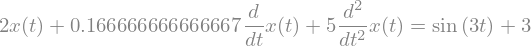

In [114]:
x_t = sp.Function('x')(t)
diff_eq = sp.Eq(5 * x_t.diff(t, 2) + 1/C * x_t.diff(t) + 2 * x_t,A + sp.sin(B * t))
diff_eq

## Rozwiązanie ogólne

In [121]:

sp.dsolve(diff_eq, x_t).simplify()


## Rozwiązanie z określonymi warunkami początkowymi

In [116]:
sp.dsolve(diff_eq, x_t, ics={x_t.subs(t, 0): 0, x_t.diff(t).subs(t, 0): 0}).simplify()

\newpage

# Zadanie 4

## Zastosowanie Transformaty Laplace'a po obu stronach równania różniczkowego z poprzedniego zadania

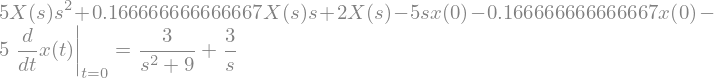

In [117]:
laplace_eq = sp.Eq(sp.laplace_transform(diff_eq.lhs, t, s, noconds=True), sp.laplace_transform(diff_eq.rhs, t, s, noconds=True))
X_s = sp.Symbol('X(s)')
laplace_eq = laplace_eq.subs(sp.laplace_transform(x_t, t, s, noconds=True), X_s)
laplace_eq

## Podstawienie warunków początkowych

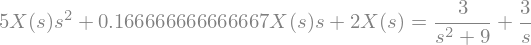

In [118]:
init_conds = {x_t.subs(t, 0): 0, x_t.diff(t).subs(t, 0): 0}
laplace_eq = laplace_eq.subs(init_conds)
laplace_eq

## Rozwiązanie dla X(s)

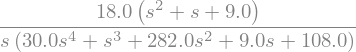

In [119]:
X_s_solution = sp.solve(laplace_eq, X_s)[0]
X_s_solution

## Przejście na dziedzinę czasu, odwrotna transformacja Laplace'a rozwiązania X(s) -> Otrzymujemy rozwiązanie x(t)

In [120]:
sp.inverse_laplace_transform(X_s_solution, s, t).simplify()

Wynik jest ten sam jak w zadaniu 3 (gdzie użyto funkcji sympy.dsolve), co sugeruje jego poprawność